In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 30
# alpha component threshold for constrained diffusion
threshold_alpha = 0.7

label_1 = "-, N="
label_2 = "+ AF647 dye, N="
label_3 = "+ miRNA, N="
label_4 = "+ mRNA, N="
color_1 = "#2b3744"
color_2 = "#f7a863"
color_3 = "#bad1df"
color_4 = "#d25743"
palette = [color_1, color_2, color_3, color_4]

postfix = "FUS_ground_truth_compare.png"

folder_save = "/home/gmgao/Desktop/RNA-diffusion-in-FUS/paper_figure_plots/Aug24_new_Figs/DiffusionProfiling-FUS_ground_truth_comparison"
fname_AIO_1 = "../SPT_results_AIO_concat-20ms_FUS488_incondensate_4Reps.csv"
fname_AIO_2 = "../SPT_results_AIO_concat-AF647dye_FUS_reconstruction_FUS488_40ms.csv"
fname_AIO_3 = "../SPT_results_AIO_concat-miR_FUS_reconstruction_FUS488_40ms.csv"
fname_AIO_4 = "../SPT_results_AIO_concat-FL_FUS_reconstruction_FUS488_40ms.csv"
fname_saspt_1 = "../saSPT-pooled-mobile-20ms_FUS488_incondensate_4Reps.csv"
fname_saspt_2 = "../saSPT-pooled-mobile-AF647dye_FUS_reconstruction_FUS488_40ms.csv"
fname_saspt_3 = "../saSPT-pooled-mobile-miR_FUS_reconstruction_FUS488_40ms.csv"
fname_saspt_4 = "../saSPT-pooled-mobile-FL_FUS_reconstruction_FUS488_40ms.csv"

## Combine dataframes

In [2]:
def only_load_frac_csv(path, one_in_x):
    # Step 1: Determine total number of rows
    total_rows = sum(1 for row in open(path))

    # Step 2: Calculate indices of rows to read (e.g., every x-th row)
    rows_to_read = range(0, total_rows, one_in_x)

    # Step 3: Read the CSV using skiprows
    df = pd.read_csv(path, skiprows=lambda x: x not in rows_to_read)

    return df


In [3]:
os.chdir(folder_save)
df1 = only_load_frac_csv(fname_AIO_1, 3)
df2 = only_load_frac_csv(fname_AIO_2, 10)
df3 = only_load_frac_csv(fname_AIO_3, 1)
df4 = only_load_frac_csv(fname_AIO_4, 1)
print(label_1, df1.shape[0])
print(label_2, df2.shape[0])
print(label_3, df3.shape[0])
print(label_4, df4.shape[0])

-, N= 77363
+ AF647 dye, N= 74994
+ miRNA, N= 94662
+ mRNA, N= 61587


In [4]:
label_1 = label_1 + f"{df1.shape[0]:,}"
label_2 = label_2 + f"{df2.shape[0]:,}"
label_3 = label_3 + f"{df3.shape[0]:,}"
label_4 = label_4 + f"{df4.shape[0]:,}"
print(label_1)
print(label_2)
print(label_3)
print(label_4)

-, N=77,363
+ AF647 dye, N=74,994
+ miRNA, N=94,662
+ mRNA, N=61,587


In [5]:
df1.insert(0, "label", np.repeat(label_1, df1.shape[0]))
df2.insert(0, "label", np.repeat(label_2, df2.shape[0]))
df3.insert(0, "label", np.repeat(label_3, df3.shape[0]))
df4.insert(0, "label", np.repeat(label_4, df4.shape[0]))

# Below sequence is important for the layer order
df_AIO = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [6]:
df1 = pd.read_csv(fname_saspt_1, dtype=float)
df2 = pd.read_csv(fname_saspt_2, dtype=float)
df3 = pd.read_csv(fname_saspt_3, dtype=float)
df4 = pd.read_csv(fname_saspt_4, dtype=float)


def extract_log10D_density(df_current_file):
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )

    return df_toplot


df_saspt_1 = extract_log10D_density(df1)
df_saspt_2 = extract_log10D_density(df2)
df_saspt_3 = extract_log10D_density(df3)
df_saspt_4 = extract_log10D_density(df4)

df_saspt_1.insert(0, "label", np.repeat(label_1, df_saspt_1.shape[0]))
df_saspt_2.insert(0, "label", np.repeat(label_2, df_saspt_2.shape[0]))
df_saspt_3.insert(0, "label", np.repeat(label_3, df_saspt_3.shape[0]))
df_saspt_4.insert(0, "label", np.repeat(label_4, df_saspt_4.shape[0]))

# Below sequence is important for the layer order
df_saspt = pd.concat([df_saspt_1, df_saspt_2, df_saspt_3, df_saspt_4], ignore_index=True)

# Plots

### Localization error

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

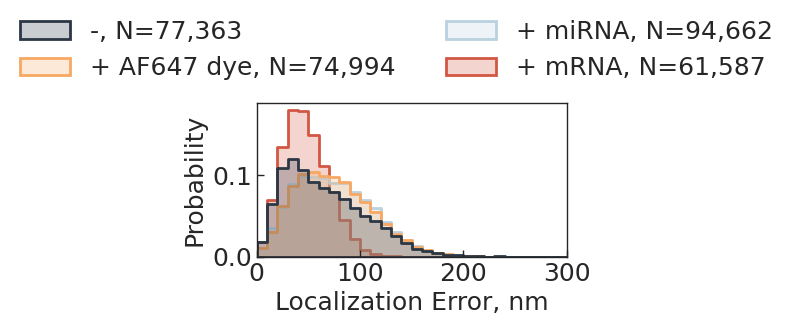

In [7]:
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["linear_fit_R2"] > 0.7]
# quantile = np.quantile(df_AIO["linear_fit_sigma"].dropna().to_numpy(), 0.999)
plt.figure(figsize=(4, 2))
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    hue="label",
    palette=palette,
    bins=30,
    binrange=(0, 300),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
)
# plt.axvline(immobile_stepsize_threshold_nm - 0.97, ls="--", color="#333232")
# plt.axvline(immobile_stepsize_threshold_nm + 0.97, ls="--", color="#f7b801")
plt.xlim(0, 300)

sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)
plt.xlabel("Localization Error, nm", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

### Mean Step Size (whether static molecule)

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

-, N=77,363 172.38884692792982 0.4134566971899557
+ AF647 dye, N=74,994 230.7769272125382 0.5643904899353183
+ miRNA, N=94,662 268.7938129482683 0.5674799418045028
+ mRNA, N=61,587 167.06079969574014 0.3869575647676864


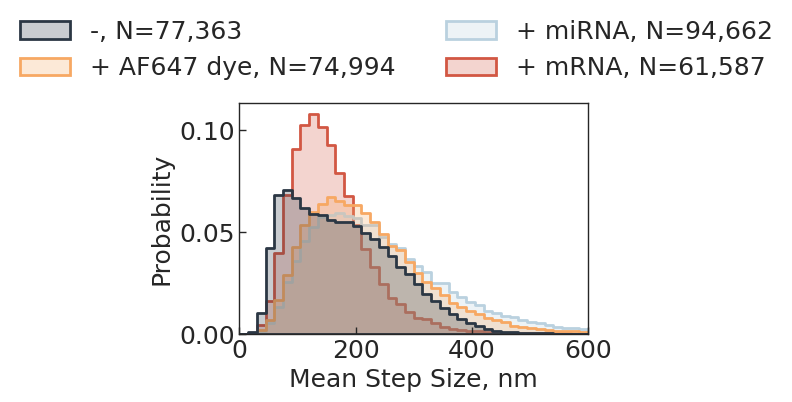

In [8]:
plt.figure(figsize=(4.5, 3))
ax = sns.histplot(
    data=df_AIO,
    x="mean_stepsize_nm",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 600),
    lw=2,
    element="step",
)
plt.xlim(0, 600)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)
# plt.axvline(immobile_stepsize_threshold_nm - 1.6, ls="--", color="#333232")
# plt.axvline(immobile_stepsize_threshold_nm + 1.6, ls="--", color="#f7b801")
plt.xlabel("Mean Step Size, nm", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig(
    "2.mean_stepsize_nm_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)
print(
    label_1,
    data[data["label"] == label_1]["mean_stepsize_nm"].mean(),
    sem(data[data["label"] == label_1]["mean_stepsize_nm"].dropna()),
)
print(
    label_2,
    data[data["label"] == label_2]["mean_stepsize_nm"].mean(),
    sem(data[data["label"] == label_2]["mean_stepsize_nm"].dropna()),
)
print(
    label_3,
    data[data["label"] == label_3]["mean_stepsize_nm"].mean(),
    sem(data[data["label"] == label_3]["mean_stepsize_nm"].dropna()),
)
print(
    label_4,
    data[data["label"] == label_4]["mean_stepsize_nm"].mean(),
    sem(data[data["label"] == label_4]["mean_stepsize_nm"].dropna()),
)

### alpha distribution

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

-, N=77,363 43442
+ AF647 dye, N=74,994 36134
+ miRNA, N=94,662 53178
-, N=77,363 0.8184683033924712 0.0017516665906058082
+ AF647 dye, N=74,994 0.7975023366352735 0.001962493953136432
+ miRNA, N=94,662 0.8214341438508622 0.0015835842792272853
+ mRNA, N=61,587 0.7945094201415872 0.001998707841927959


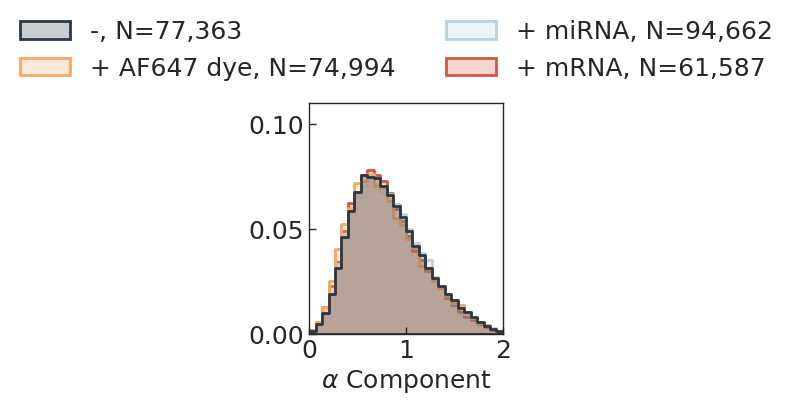

In [9]:
plt.figure(figsize=(2.5, 3))
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    hue="label",
    palette=palette,
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    # legend=False,
)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)
# plt.axvline(threshold_alpha - 0.011, ls="--", color="#f7b801")
# plt.axvline(threshold_alpha + 0.011, ls="--", color="#87a878")
plt.xlim(0, 2)
plt.ylim(0, 0.11)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("")
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])
print(
    label_1,
    data[data["label"] == label_1]["alpha"].mean(),
    sem(data[data["label"] == label_1]["alpha"].dropna()),
)
print(
    label_2,
    data[data["label"] == label_2]["alpha"].mean(),
    sem(data[data["label"] == label_2]["alpha"].dropna()),
)
print(
    label_3,
    data[data["label"] == label_3]["alpha"].mean(),
    sem(data[data["label"] == label_3]["alpha"].dropna()),
)
print(
    label_4,
    data[data["label"] == label_4]["alpha"].mean(),
    sem(data[data["label"] == label_4]["alpha"].dropna()),
)

### Angle Distribution

In [10]:
lst_angle = []
lst_label = []
for _, row in df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_label,
    },
    dtype=object,
)

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

-, N=77,363 105.4676483440548 0.07433889889530919
+ AF647 dye, N=74,994 117.15700561200843 0.07392169353591545
+ miRNA, N=94,662 119.23052278234964 0.05818597225589172


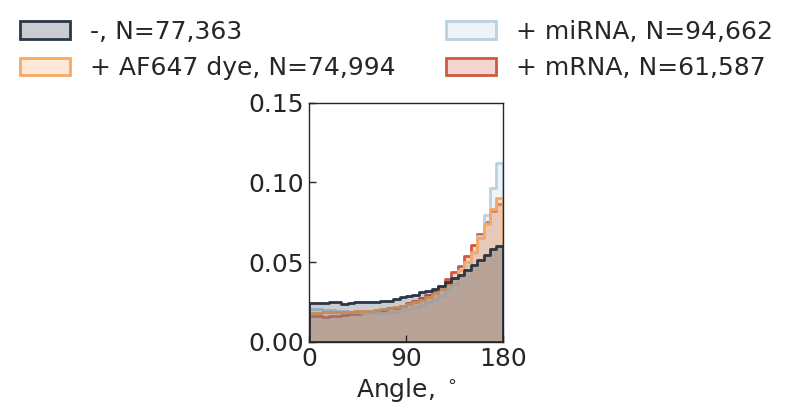

In [11]:
plt.figure(figsize=(2.5, 3.1))
bins = 30
ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    palette=palette,
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    # legend=False,
)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)
# plt.axhline(1 / bins - 0.0004, color="#87a878", ls="--")
# plt.axhline(1 / bins + 0.0004, color="#f7b801", ls="--")
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.15)
# plt.yticks([0, 0.03, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("")
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("4.angle_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
print(
    label_1,
    data[data["label"] == label_1]["angle"].mean(),
    sem(data[data["label"] == label_1]["angle"].dropna()),
)
print(
    label_2,
    data[data["label"] == label_2]["angle"].mean(),
    sem(data[data["label"] == label_2]["angle"].dropna()),
)
print(
    label_3,
    data[data["label"] == label_3]["angle"].mean(),
    sem(data[data["label"] == label_3]["angle"].dropna()),
)

### D distribution among the non contrained molecules

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

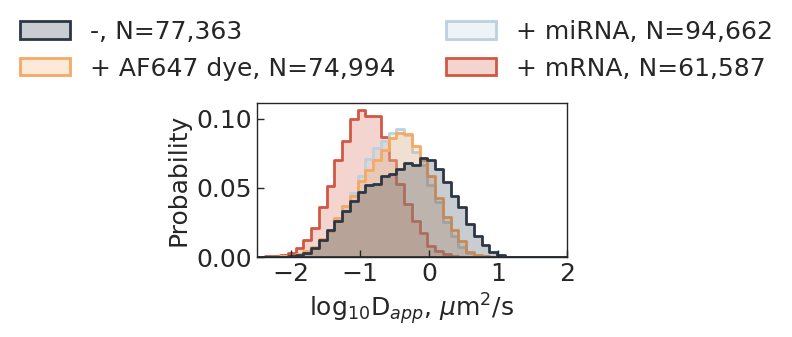

In [12]:
data = df_AIO[df_AIO["linear_fit_R2"] > 0.7]
data = data[data["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["alpha"] > 0.5]
plt.figure(figsize=(4, 2))
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(-2.5, 2),
    lw=2,
    element="step",
)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)

plt.xlim(-2.5, 2)
plt.xticks([-2, -1, 0, 1, 2])
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig(
    "5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)

### Plot saSPT

/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gmgao/miniconda3/envs/spt/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

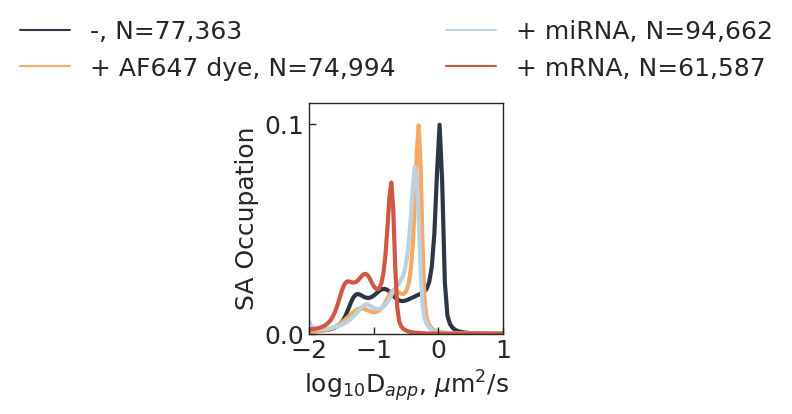

In [13]:
plt.figure(figsize=(2.5, 3))
ax = sns.lineplot(
    data=df_saspt,
    x="log10D",
    y="Probability",
    hue="label",
    palette=palette,
    lw=3,
    # legend=False,
)
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.45, 1),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)
log10D = df_saspt["log10D"].to_numpy(dtype=float)
plt.xlim(-2, 1)
plt.xticks([-2, -1, 0, 1])
plt.ylim(0, 0.11)
plt.yticks([0, 0.1])
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=18)
plt.ylabel("SA Occupation", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("6.saspt_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

In [14]:
from scipy.signal import find_peaks


def find_major_peak(x, y):
  """
  Finds the x value corresponding to the major peak (highest value) in the y data.

  Args:
      x: A 1D NumPy array representing the x-axis values.
      y: A 1D NumPy array representing the y-axis values (curve).

  Returns:
      A tuple containing the x value and the corresponding y value of the major peak,
      or None if no peak is found.
  """
  peaks, _ = find_peaks(y)
  # If no peaks are found, return None
  if len(peaks) == 0:
    return None

  # Find the index of the major peak (highest value in y)
  major_peak_index = peaks[np.argmax(y[peaks])]
  major_peak_x = x[major_peak_index]
  major_peak_y = y[major_peak_index]

  return major_peak_x, major_peak_y


major_peak_x, major_peak_y = find_major_peak(
    df_saspt[df_saspt["label"] == label_1]["log10D"].to_numpy(float),
    df_saspt[df_saspt["label"] == label_1]["Probability"].to_numpy(float),
)
print(label_1, 10**major_peak_x)
major_peak_x, major_peak_y = find_major_peak(
    df_saspt[df_saspt["label"] == label_2]["log10D"].to_numpy(float),
    df_saspt[df_saspt["label"] == label_2]["Probability"].to_numpy(float),
)
print(label_2, 10**major_peak_x)
major_peak_x, major_peak_y = find_major_peak(
    df_saspt[df_saspt["label"] == label_3]["log10D"].to_numpy(float),
    df_saspt[df_saspt["label"] == label_3]["Probability"].to_numpy(float),
)
print(label_3, 10**major_peak_x)
major_peak_x, major_peak_y = find_major_peak(
    df_saspt[df_saspt["label"] == label_4]["log10D"].to_numpy(float),
    df_saspt[df_saspt["label"] == label_4]["Probability"].to_numpy(float),
)
print(label_4, 10**major_peak_x)

-, N=77,363 1.0476157527896652
+ AF647 dye, N=74,994 0.4977023564332111
+ miRNA, N=94,662 0.4328761281083059
+ mRNA, N=61,587 0.1873817422860384
